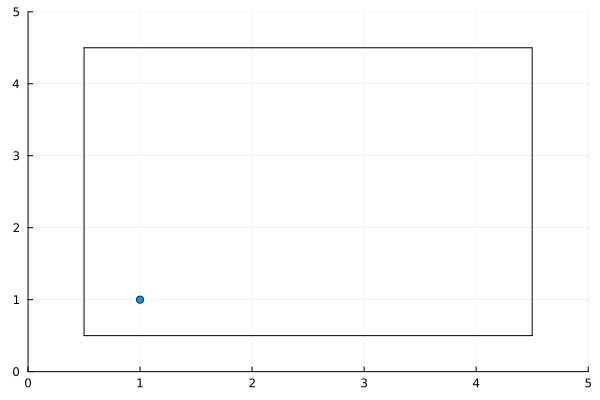

In [45]:
using Plots

mutable struct Config
    n::Int
end

mutable struct Node
    x::Int
    y::Int
    prev    
    succ
end

function get_config()
    n       = get_n()
    config  = Config(n)
    return config
end

function get_dyad(config::Config)
    n           = config.n
    ω           = Node(n+1,n+1, nothing,  "after")
    α           = Node(0,  0  , "before",       ω)
    ω           = Node(n+1,n+1, α,        "after")
    return α, ω
end

function get_next_xs()
    config  = get_config()
    next_xs = Set(1:config.n)
    return next_xs
end

function get_null()
    null    = Node(-1, -1, "before", "after")
    return  null
end

function get_n()
    n::Int  = 4
end

function read_path(index::Node)
    path = []
    while index.succ != "after"
        index = index.succ
        these_coords = [index.x, index.y]
        push!(path, these_coords)
        index = index.succ
    end
    return path
end

function draw(path)
    config    = get_config()
    n         = config.n
    scatter_g = scatter([xy[1] for xy in path],
                        [xy[2] for xy in path],
                            xlims=(0,n+1),
                            ylims=(0,n+1),
                            legend=:false)
    plot!([  0.5,  0.5],[  0.5,  n+0.5],  color="black")
    plot!([n+0.5,  0.5],[n+0.5,  n+0.5],  color="black")
    
    plot!([n+0.5,n+0.5],[  0.5,  n+0.5],  color="black")
    plot!([n+0.5,  0.5],[  0.5,    0.5],  color="black")
    display(scatter_g)
end
    


function N_Q_J()
    null        = get_null()
    config      = get_config()
    next_xs     = get_next_xs() 
    α, ω        = get_dyad(config)
    
    index       = α
    reg_x       = 1
    
    first       = Node(reg_x, index.y+1, α, ω)
    α.succ      = first
    ω.prev      = first

    index       = α

    path  = read_path(α)
    draw(path)
    
    
    
   
end

N_Q_J()
    